## Observations and Insights 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combine=pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_study_combine

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice.
mice_count=mouse_study_combine["Mouse ID"].nunique()
print(f'Unique Number of Mice: {mice_count}')


Unique Number of Mice: 249


In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_study_combine[mouse_study_combine.duplicated(['Mouse ID', 'Timepoint'])] 
duplicate[['Mouse ID', 'Timepoint']]

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=mouse_study_combine[mouse_study_combine.isin(duplicate)==False]


In [28]:
# Checking the number of mice in the clean DataFrame.
print(f'Number of Mice in clean data frame: {clean_data["Mouse ID"].nunique()}')
print(f'Number of rows in clean data frame: {clean_data["Mouse ID"].count()}')

Number of Mice in clean data frame: 249
Number of rows in clean data frame: 1888


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_group=clean_data.groupby("Drug Regimen")
tumor_mean=round(tumor_group["Tumor Volume (mm3)"].mean(),2)
tumor_median=round(tumor_group["Tumor Volume (mm3)"].median(),2)
tumor_var=round(tumor_group["Tumor Volume (mm3)"].var(),2)
tumor_std=round(tumor_group["Tumor Volume (mm3)"].std(),2)
tumor_sem=round(tumor_group["Tumor Volume (mm3)"].sem(),2)
tumor_descriptive=pd.DataFrame({"Mean":tumor_mean, "Median":tumor_median, "Variance":tumor_var,
    "STD":tumor_std, "SEM":tumor_sem})
tumor_descriptive


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_summary=tumor_group.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std','sem']})
round(agg_tumor_summary,2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

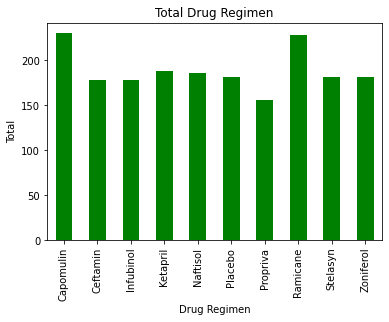

In [41]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total=tumor_group['Mouse ID'].count()
Regimen_bar = total.plot(kind='bar', facecolor='g', xlabel='Drug Regimen', ylabel='Total', title='Total Drug Regimen')
plt.xticks(rotation=90)
plt.show()


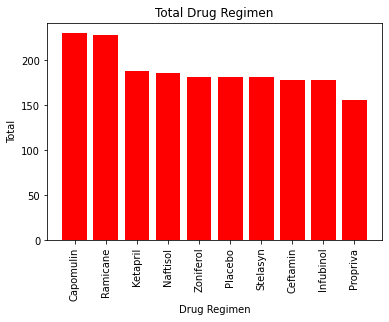

In [42]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
y_axis=clean_data["Drug Regimen"].value_counts().values
x_axis=clean_data["Drug Regimen"].value_counts().index
plt.bar(x_axis, y_axis, color='red')
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total")
plt.title("Total Drug Regimen")
plt.show()


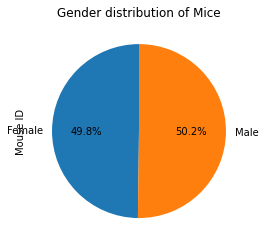

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group=clean_data.groupby("Sex")
gender_count=gender_group["Mouse ID"].nunique()
label=gender_count.index
gender_count.plot(kind='pie', y='Mouse ID', labels=label,autopct="%.1f%%", startangle=90)
plt.title("Gender distribution of Mice")
plt.show()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
